In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.concat([pd.read_csv("Atts_agroconcept_survey.csv", sep=';'),pd.read_csv("Atts_nonpart_survey.csv", sep=';')])

In [3]:
CCMMs = ['legum','conc','add', 'lact', 'breed', 'covman', 'comp', 'drag', 'cov', 'plough', 'solar', 'biog', 'ecodr', ]

In [4]:
array = np.array(df[CCMMs])
array = np.nan_to_num(array, nan=3)

In [5]:
array[array>1] = 0

In [6]:
df['CCMM_adopted_count'] = np.sum(array, axis=1).tolist()

In [7]:
array = np.array(df[CCMMs])
array = np.nan_to_num(array, nan=3)

In [8]:
array[array<3] = 1
array[array==3] = 0

In [9]:
df['CCMM_relevant_count'] = np.sum(array, axis=1).tolist()

In [10]:
df['CCMM_adopted_percent'] = df['CCMM_adopted_count'] / df['CCMM_relevant_count']

In [11]:
del array

In [12]:
df_agcon_all = pd.read_csv("Edges_agroconcept_and_external_contacts.csv", sep=';')
df_nonpart_all = pd.read_csv("Edges_nonpart_all.csv", sep=';')
edges_df = pd.concat([df_agcon_all,df_nonpart_all])
av_freq_dict = edges_df.groupby(edges_df['sender_id'])['frequency'].mean().to_dict()
del edges_df

In [13]:
df['av_freq'] = df['ego_id'].map(av_freq_dict)

<AxesSubplot:xlabel='av_freq', ylabel='CCMM_adopted_percent'>

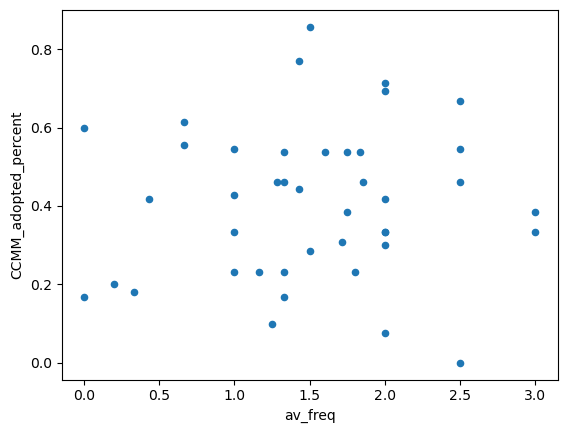

In [14]:
df.plot.scatter(x='av_freq', y='CCMM_adopted_percent')

In [15]:
print(df['av_freq'].corr(df['CCMM_adopted_percent']))

0.07030791085897825
